# DESARROLLO DE LA PRUEBA

# Librerias

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


## 1. Lectura de los datos

In [2]:
data= pd.read_csv("Cruceros.csv")

## 2. Mostrar columnas

In [3]:
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## 3. Calcular estadísticas básicas de los datos, interpretarlos y enunciar sus observaciones

In [4]:
# tipos de variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


En este primer resultado, se observa que no hay datos nulos y además la tipología de cada variable, la cual corresponde a dos variables categoricas, y 7 variables númericas.


In [6]:
#cantidad de datos
len_data=len(data)
print("Cantidad de observaciones: ",len(data))

Cantidad de observaciones:  158


In [7]:
#Valores unicos
s=[print("La variable " + name + " tiene como valores unicos: \n"+ ", ".join(map(str,data[name].unique())),"\n") 
for name in list(data.select_dtypes(include='object').columns)]

La variable Ship_name tiene como valores unicos: 
Journey, Quest, Celebration, Conquest, Destiny, Ecstasy, Elation, Fantasy, Fascination, Freedom, Glory, Holiday, Imagination, Inspiration, Legend, Liberty*, Miracle, Paradise, Pride, Sensation, Spirit, Triumph, Valor, Victory, Century, Constellation, Galaxy, Infinity, Mercury, Millenium, Solstice, Summit, Xpedition, Zenith, Allegra, Atlantica, Classica, Europa, Fortuna, Magica, Marina, Mediterranea, Romantica, Serena, Victoria, Serenity, Symphony, QueenElizabethII, QueenMary2, QueenVictoria, Magic, Wonder, Amsterdam, Eurodam, Maasdam, Noordam, Oosterdam, Prinsendam, Rotterdam, Ryndam, Statendam, Veendam, Volendam, Westerdam, Zaandam, Zuiderdam, Armonia, Fantasia, Lirica, Melody, Musica, Opera, Rhapsody, Sinfonia, Crown, Dawn, Dream, Gem, Jewel, Majesty, PrideofAloha, PrideofAmerica, Sea, Star, Sun, Wind, Insignia, Nautica, Regatta, MarcoPolo, Arcadia, Artemis, Aurora, Oceana, Oriana, Ventura, Caribbean, Coral, Diamond, Emerald, Golden, 

Al revisar los valores unicos de variables categoricas notamos que la variable Ship_name contiene 138 clases. Del mismo modo, la variable cruise_line tine 20 clases.

In [376]:
# Variables categoricas
data.describe(include=[object])

,Ship_name,Cruise_line
count,158,158
unique,138,20
top,Spirit,Royal_Caribbean
freq,4,23


In [107]:
# Distribution of cruise_line
data['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

En cuando a la frecuencia de cada clase en la variable Cruise_line, se observa que alrededor de la mitad de las clases tienen pocas observaciones,lo que hace que no este balanceada esta variable.

In [374]:
# Distribution of cruise_line
data['Ship_name'].value_counts()

Spirit          4
Legend          3
Star            3
Rhapsody        2
Mariner         2
               ..
Serena          1
Romantica       1
Mediterranea    1
Marina          1
Surf            1
Name: Ship_name, Length: 138, dtype: int64

Del mismo modo, la variable ship_name tiene muchas clases (123) con muy poca observacione, es decir, hay alta cardinalidad.

In [9]:
# Variables numericas
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


En cuanto a las variables continuas, la variable Age muestra que la edad promedio de la tripulación es de 16 años teniendo a un niño de 4 años como el menor y un adulto de 48 como el mayor de la tripulación. Por su parte, la variable Tonnage indica un valor promedio de 71 con valores minimos de 2.3 y maximo de 220. En cuanto a la variable passengers, se tiene un valor promedio de 18 y registra un valor minimo de 0.66 y maximo de 54. La variable length tiene un valor promedio de 8.1 con un valor minimo de 2.79 y maximo de 11.82. Respecto la variable cabins, se encuentre en los datos un valor promedio 8.83 y un valor minimo de 0.33 y maximo 27. Conforme a la pessenger_density, se muestra que tiene un valor promedio de 39.9  con valor minimo de 17.7 y maximo de 71.43. Finalmente, con respecto a la variable de respuesta crew el tamaño promedio de la tripulación es dde 7.8 con un valor minimo de 0.59 y maximo de 21.

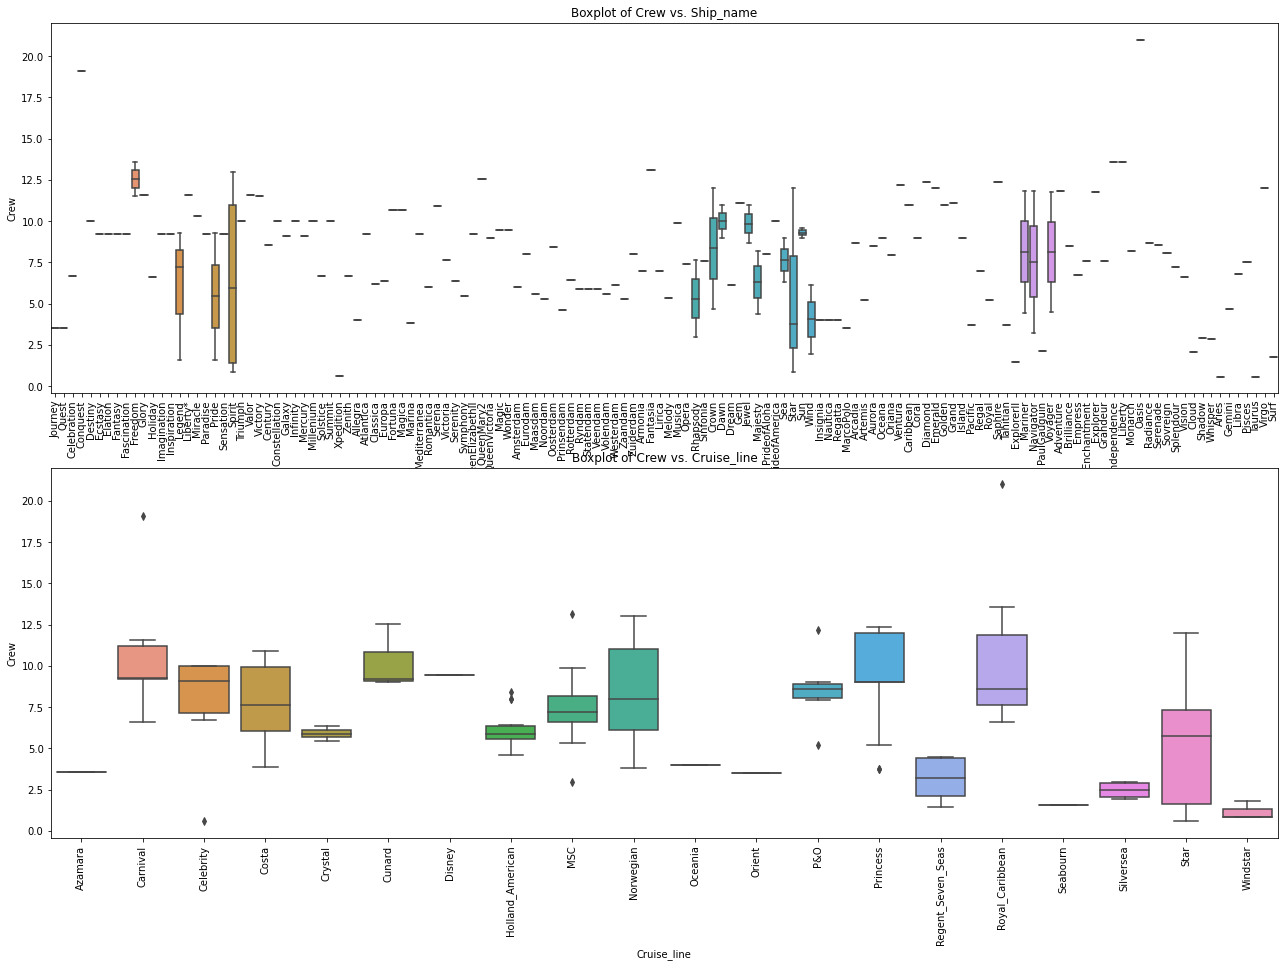

In [21]:
# variables discretas vs variable de respuesta
plt.figure(figsize=(22,15))
vars_to_plot = data.select_dtypes(include=['object']).columns.tolist()
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = var, y='crew', data = data)
    title_string = "Boxplot of Crew vs. " + var
    plt.ylabel("Crew")
    plt.title(title_string)
    plt.xticks(fontsize = 10, rotation=90) 

Ahora bien, al relacionar las variables categoricas  con la variable de respuesta (crew) notamos que ambas variables descriptivamente no reflejan un diferencia entre clases. Ademas algunas clases no tiene muchas observaciones tal como se mencionó anteriormente. Esto logra evidenciar a nivel descriptivo que la variable ship_name no aportará mucha información para predecir el tamaño de la tripulación.

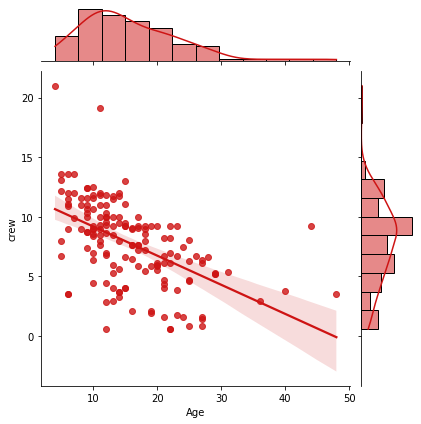

In [322]:
# variable age vs crew
sns.jointplot(data['Age'],data['crew'], kind="reg", color="#ce1414")

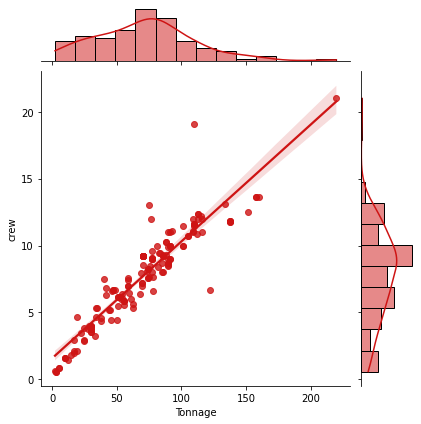

In [323]:
# variable Tonnage vs crew
sns.jointplot(data['Tonnage'],data['crew'], kind="reg", color="#ce1414")

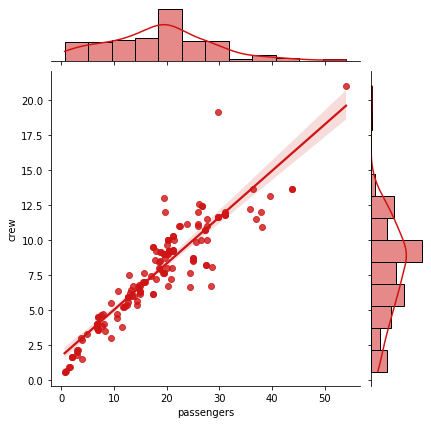

In [324]:
# variable passengers vs crew
sns.jointplot(data['passengers'],data['crew'], kind="reg", color="#ce1414")

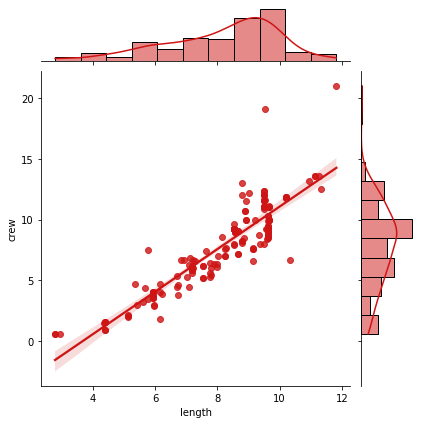

In [325]:
# variable length vs crew
sns.jointplot(data['length'],data['crew'], kind="reg", color="#ce1414")

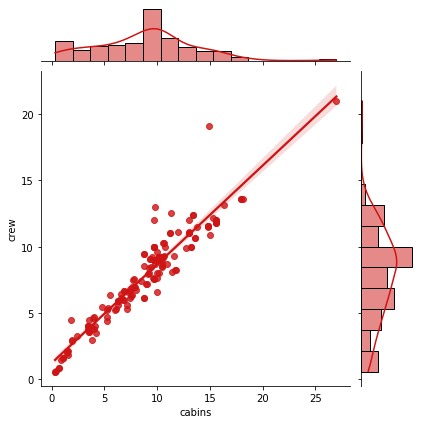

In [326]:
# variable age vs crew
sns.jointplot(data['cabins'],data['crew'], kind="reg", color="#ce1414")

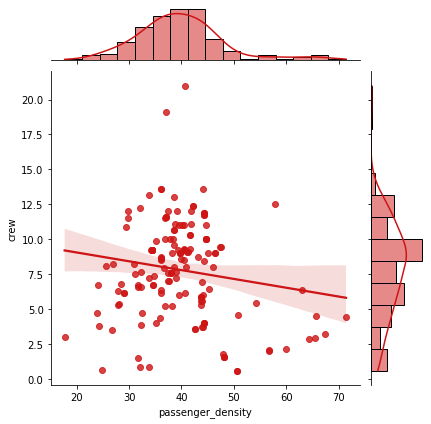

In [327]:
# variable age vs crew
sns.jointplot(data['passenger_density'],data['crew'], kind="reg", color="#ce1414")

En cuanto a la relación entre las Age passenger_density con la variable de respuesta Crew se nota mucha disperción entre los datos lo que muestra muy poco fuerza de relación. Otro punto importante, es que estas variables independientes tiene una relación inversamente proporcional con la variable crew.

Por su parte, el resto de variable continuas muestras poca disperción teniendo un buen ajuste entre los datos. Ademas presentan un relación directamente proporcional con respuesta la variable de respuesta.

In [61]:
# Create a correlation matrix
corr    = data.corr()
pos_cor = corr['crew'] >0
neg_cor = corr['crew'] <0
corr['crew'][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with Crew.

crew          1.000000
cabins        0.950823
Tonnage       0.927569
passengers    0.915234
length        0.895857
Name: crew, dtype: float64

In [62]:
corr['crew'][neg_cor].sort_values()

Age                 -0.530657
passenger_density   -0.155509
Name: crew, dtype: float64



En cuanto a la correlación entre las variables, los resultados reafirman lo mencionado anteriormente, las variables cabins, tonnage, passengers y length tiene una alta y positiva relación lineal con crew. Mientras que las variable age y passenger_density tiene un relación lineal baja y negativa con crew. 

## 4. Seleccionar las columnas que se consideran importantes para predecir el tamaño de la tripulación (crew)

Para seleccionar las columnas más importantes para predicir el tamaño de la tripulación, se utilizará tres metodos de selección de caracteristica :Basic method, correlation heatmap method, y Random Forest Importance (feature importance), LASSO regression embedded method (L1 regularization).

### 4.1 Feature Selection

In [74]:
#Basic method
datafm=data.select_dtypes(exclude=['object']).copy()
Y_train=datafm.crew
datafm.drop(labels=['crew'],axis=1, inplace=True)
X_train=datafm.copy()
sel = VarianceThreshold(threshold=0)
sel.fit(X_train) 
print("Number of features that are not constant: "+str(sum(sel.get_support())))
print("features that are not constant: "+str(X_train.columns[sel.get_support()].tolist()))

Number of features that are not constant: 6
features that are not constant: ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density']


El resultado de este primer metodo muestra que las variables no presentan un mismo valor, es decir, no son factores constantes.

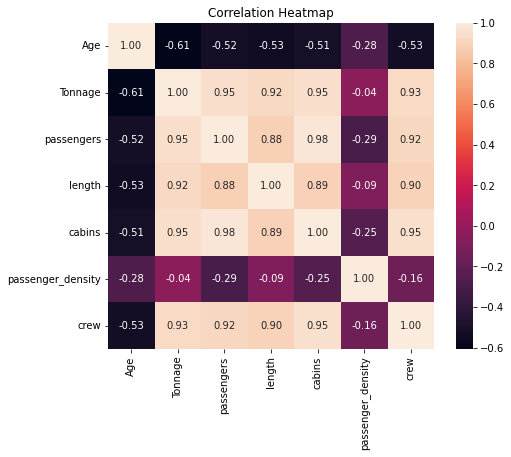

In [115]:
# Correlation heatmap method
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show()


El resultado de este metodo muestra que las variables passenger_density y Age no las que menos estan relaconadas linealmente con la variable de respuesta (crew), ademas presenta relación inversamente proporcional.

**Nota:** Revisando las correlaciones entre las variables independientes, se nota que hay alta relación lineal, lo que puede resultar como un problema de multicolinealidad

<AxesSubplot:>

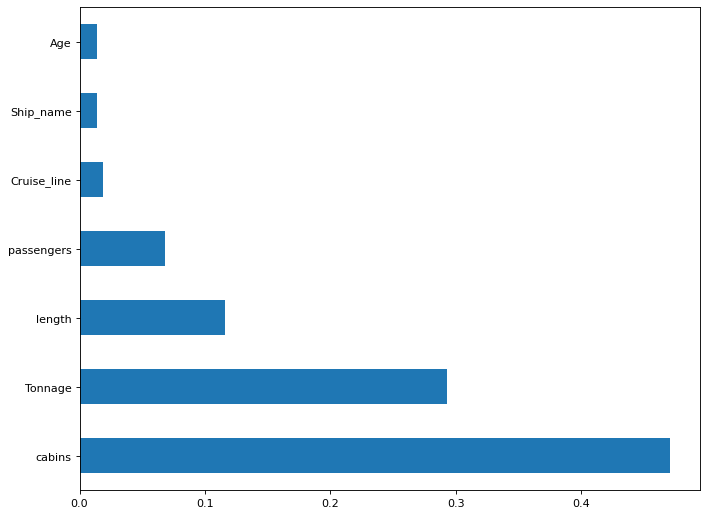

In [112]:
#Random Forest Importance (feature importance)
X_train1=data.iloc[:,:-1]
X_train1['Ship_name']=X_train1['Ship_name'].astype('category').cat.codes
X_train1['Cruise_line']=X_train1['Cruise_line'].astype('category').cat.codes
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train1, Y_train) 
y_pred = clf.predict(X_train1)
# visualize feature importance
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= X_train1.columns)
feat_importances.nlargest(7).plot(kind='barh')

Los resultados de este modelo, muestra que 'cabins' es la variable mas importante del modelo seguida de 'Tonnage' y 'length'.Por otra parte, las variables ship_name, cruise_line y Age parecen que no aportan mucho a la predicción del tamaño de la tripulación.

In [106]:
# LASSO regression embedded method (L1 regularization)


scaler = StandardScaler()
scaler.fit(X_train1)
sel_ = SelectFromModel(Lasso(alpha=1))
sel_.fit(scaler.transform(X_train1), Y_train)
selected_feat = X_train1.columns[(sel_.get_support())]
print('total features: {}'.format((X_train1.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))
print("Feature selected: "+ str(X_train1.columns[(sel_.get_support())].tolist()))

total features: 8
selected features: 3
features with coefficients shrank to zero: 5
Feature selected: ['Tonnage', 'length', 'cabins']


Finalmente, usando el metodo lasso se observa son 3 variables ('Tonnage', 'length', 'cabins) son las adecuadas para predicir el tamaño de la tripulación. 

Lo anterior, ayudará a prevenir problemas de sobre ajuste o reduciría la complejidad del modelo.

**conclusiones:** teniendo los resultados de la extración de caracteristicas, notamos que para evitar la complejidad (overffiting) del modelo, dado que hay muy pocas observaciones, sugiero trabajar incialmente con cuatro variables 'Tonnage', 'length', 'cabins', 'passengers'.

### 6. Utiliza “one-hot encoding” para las características categóricas


In [122]:
# one-hot encoding for ship_name
ship_name_data=pd.get_dummies(data['Ship_name'])
print('counts of variables: {}'.format(ship_name_data.shape[1]))
ship_name_data.head()

counts of variables: 138


,Adventure,Allegra,Amsterdam,Arcadia,Aries,Armonia,Artemis,Atlantica,Aurora,Brilliance,...,Volendam,Voyager,Westerdam,Whisper,Wind,Wonder,Xpedition,Zaandam,Zenith,Zuiderdam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# one-hot encoding for cruise_line
cruise_line_data=pd.get_dummies(data['Cruise_line'])
print('counts of variables: {}'.format(cruise_line_data.shape[1]))
cruise_line_data.head()

counts of variables: 20


,Azamara,Carnival,Celebrity,Costa,Crystal,Cunard,Disney,Holland_American,MSC,Norwegian,Oceania,Orient,P&O,Princess,Regent_Seven_Seas,Royal_Caribbean,Seabourn,Silversea,Star,Windstar
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 7. Crea conjuntos de entrenamiento y prueba (utilice el 60 % de los datos para el entrenamiento y el restante para prueba).

In [385]:
# Seleccionamos las variables mas importantes

# data_new=pd.concat([data.iloc[:,2:], cruise_line_data], axis=1)
data_best_model= data[['Tonnage','length','cabins','passengers','crew']]

In [383]:
train, test = train_test_split(data_best_model, test_size = 0.40, random_state = 123)
print(" tamaño de Training: ", len(train))
print("tamaño de Test: ", len(test))

 tamaño de Training:  94
tamaño de Test:  64


In [386]:
# training set
train_x=train.iloc[:,:-1].reset_index(drop="index")
train_y=train['crew'].reset_index(drop="index")

In [387]:
# testing set
test_x=test.iloc[:,:-1].reset_index(drop="index")
test_y=test['crew'].reset_index(drop="index")

### 8. Cree un modelo de aprendizaje automático para predecir el tamaño de la tripulación.


#### Model 1 (Decision tree)

In [341]:
clf_dt=DecisionTreeRegressor(criterion="mse",
                                 max_depth=None, 
                                 max_features = None, 
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, 
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0,
                                 splitter="best")

clf_dt.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse')

In [377]:
def Plot_prediction(model,test_X,test_Y):
  clf_rf_probas = pd.Series(model.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = clf_dt.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

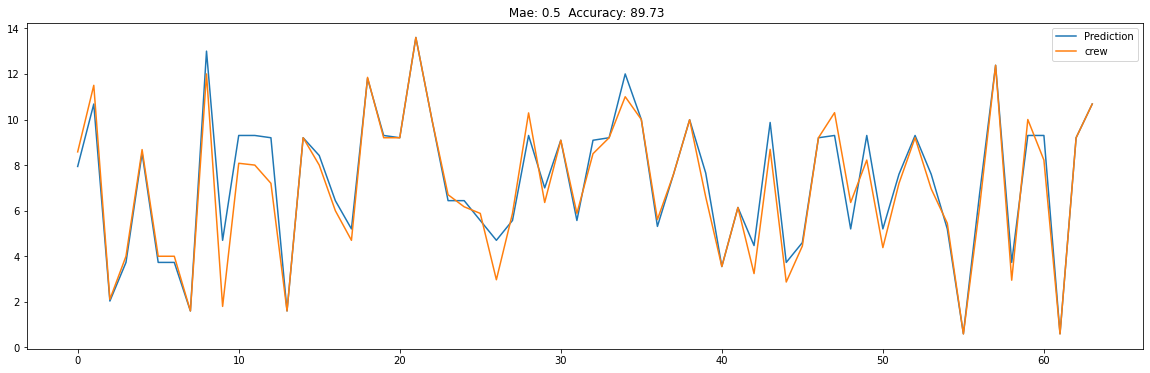

In [378]:

Plot_prediction(clf_dt,test_x,test_y)

#### Model 2 (Random forest)

In [344]:
clf_rf =RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                             criterion="mse", max_depth=17,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=80, n_jobs=None,
                                             oob_score=False, random_state=280,
                                             verbose=0, warm_start=True)
clf_rf.fit(train_x, train_y)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=17,
                      max_features='auto', n_estimators=80, random_state=280,
                      warm_start=True)

In [379]:
def Plot_prediction(model,test_X,test_Y):
  clf_rf_probas = pd.Series(model.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = clf_rf.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

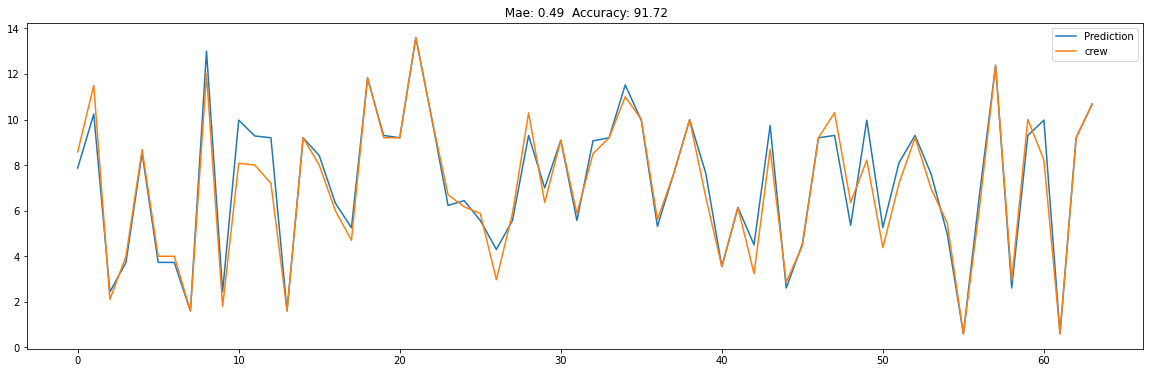

In [380]:
Plot_prediction(clf_rf,test_x,test_y)

#### Model 3 (XGboost)

In [346]:

clf_xgbr = xgb.XGBRegressor(base_score=0.5, 
                        booster='gbtree', 
                        colsample_bylevel=1,
                        colsample_bynode=1, 
                        colsample_bytree=1, 
                        gamma=0,
                        importance_type='gain', 
                        learning_rate=0.1, 
                        max_delta_step=0,
                        max_depth=3, 
                        min_child_weight=1,
                        missing=1, 
                        n_estimators=100,
                        n_jobs=1, 
                        nthread=None, 
                        objective='reg:linear', 
                        random_state=0,
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=None,
                        silent=None, 
                        subsample=1, 
                        verbosity=1)

In [347]:
clf_xgbr.fit(train_x, train_y)

[17:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=1, monotone_constraints='()', n_estimators=100, n_jobs=1,
             nthread=1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [381]:
def Plot_prediction(model,test_X,test_Y):
  clf_rf_probas = pd.Series(model.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = clf_xgbr.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

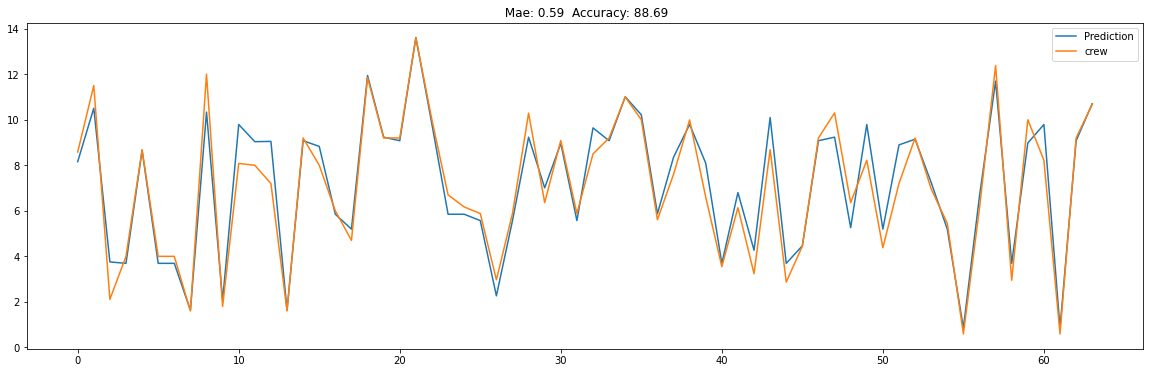

In [382]:
Plot_prediction(clf_xgbr,test_x,test_y)

Dados los resultados de los tres modelos, se observa que randomforest es el mejor modelo que predice el tamaño de la tripulación con respecto a los demas modelos. Por esta razón, sugerimos 

### Optimized Model

In [388]:
param_grid = {
    'max_depth': [15, 16,17,18,19, 20, 21,17, None],
    'n_estimators': [80, 84, 85, 86, 90, 95,100, 150],
}
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Fitting 3 folds for each of 72 candidates, totalling 216 fits
 
-----------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 15, 'n_estimators': 150}
-----------------------------------------------------------------------------


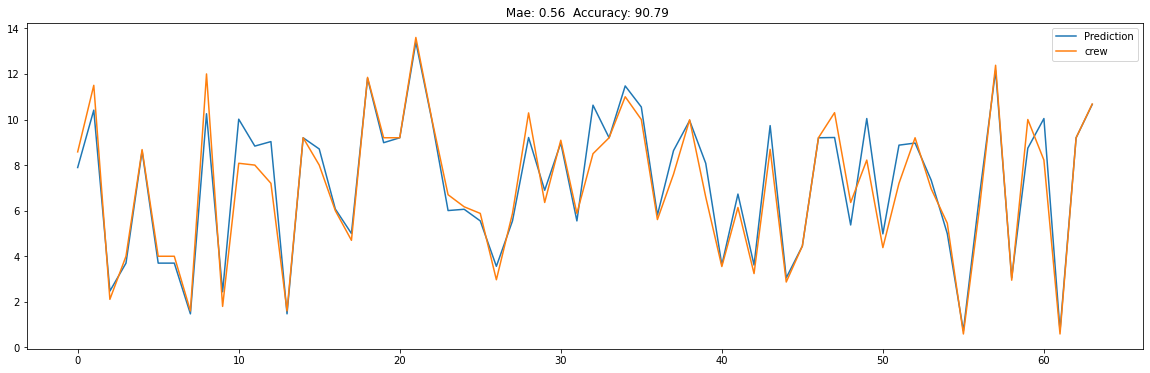

In [389]:
def Rf_selecFromModel(train_X,train_Y,test_X,test_Y):
  model =RandomForestRegressor(random_state=314, max_depth=15,n_estimators=100 )
  ftwo_scorer = make_scorer(mean_absolute_percentage_error)
  grid_search = GridSearchCV(estimator = model, scoring=ftwo_scorer,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(train_X, train_Y)
  print(' ')
  print("-----------------------------------------------------------------------------")
  print('Best Hyperparameters: %s' % grid_search.best_params_)
  print("-----------------------------------------------------------------------------")
  clf_rf_probas = pd.Series(grid_search.best_estimator_.predict(test_X))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  predictions = grid_search.predict(test_x)
  #Mean Absolute Error
  mae=round(np.mean(abs(predictions - test_y)),2)
  mape = 100 * (abs(predictions - test_Y) / test_Y)
  random_pred.columns=['Prediction', 'crew']
  random_pred.plot(kind="line",figsize=(20,6))
  accuracy = round(100 - np.mean(mape),2)
  plt.title(" Mae: "+ str(np.array(mae))+"  Accuracy: "+str(accuracy))

Rf_selecFromModel(train_x,train_y,test_x,test_y)

### 9. Calcula el coeficiente de correlación de Pearson para el conjunto de entrenamiento y los conjuntos de datos de prueba.

In [363]:
corr_matrix=train.corr()
corr_matrix

,Tonnage,length,cabins,passengers,crew
Tonnage,1.000000,0.923404,0.944011,0.946947,0.916366
length,0.923404,1.000000,0.874060,0.872503,0.882062
cabins,0.944011,0.874060,1.000000,0.970109,0.947156
passengers,0.946947,0.872503,0.970109,1.000000,0.909855
crew,0.916366,0.882062,0.947156,0.909855,1.000000


In [362]:
# r, p = stats.pearsonr(train['Tonnage'], train['crew'])
# print(f"Correlación Pearson: r={r}, p-value={p}")

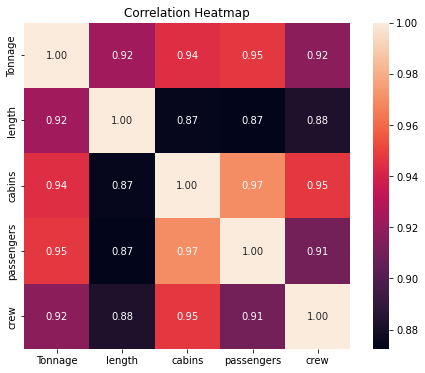

In [369]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')

In [370]:
corr_matrix_test=test.corr()
corr_matrix_test

,Tonnage,length,cabins,passengers,crew
Tonnage,1.000000,0.933541,0.957037,0.939996,0.947601
length,0.933541,1.000000,0.917295,0.900212,0.922294
cabins,0.957037,0.917295,1.000000,0.986762,0.953961
passengers,0.939996,0.900212,0.986762,1.000000,0.918588
crew,0.947601,0.922294,0.953961,0.918588,1.000000


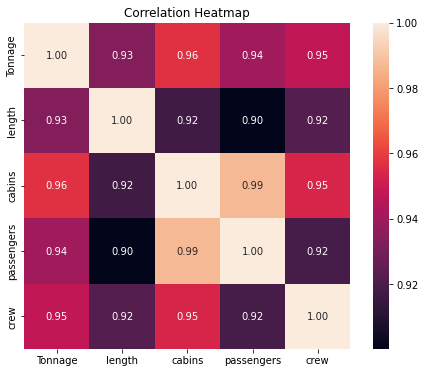

In [372]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix_test, square=True, annot=True, fmt='.2f', linecolor='black')

### 10. Describa los hiperparámetros en su modelo y cómo los cambiaría para mejorar el rendimiento del modelo.

### 11. ¿Qué es la regularización? ¿Cuál es el parámetro de regularización en su modelo?

### 12. Trazar el valor del parámetro de regularización frente a la correlación de Pearson para los conjuntos de prueba y entrenamiento, y ver si su modelo tiene un problema de sesgo o de varianza